# Deep Learning

___

*Source: [Chollet et al., Deep Learning With R](https://www.amazon.com/Deep-Learning-R-Francois-Chollet/dp/161729554X) *

___

In [2]:
source('src/lib.R')

Is **a subfield** of machine learning.

<img src="fig/deep_learning.PNG" width="400">

**Deep learning** isn’t a reference to any kind of deeper understanding achieved by the approach; rather, it **stands for this idea of successive layers of representations**. How many layers contribute to a model of the data is called the been depth of the model. Other appropriate names for the field could have and layers of *layered representations learning* or *hierarchical representations learning*.

Other approaches to machine learning tend to focus on learning only one or two layers of representation of the data; hence they’re sometimes called *shallow learning*

In deep learning, these layered representations are (almost always) learned via models called
**neural networks** , structured in literal layers stacked one after the other. The term neural network is a reference to neurobiology, but although some of the central concepts in deep learning were developed in part by drawing inspiration from our understanding of the brain, **deep learning models are not models of the brain**. There’s no evidence that thenot brain implements anything like the learning mechanisms used in modern deep-learning
models.

<img src="fig/untrained_layer.PNG" width="400"> <img src="fig/trained_layers.PNG" width="400">

The cool thing is that such representations are all **automatically** learnt from data. This is a large advantage to other approaches such as *Kernel Methods*, where functions are typically crafted by hand rather than learned from data and feature engineering is very often required to make the initial input data more amenable to processing. For instance, in the case of an SVM, only the separation hyperplane is learned, but the representation of the data is already given.

This potentially allows to greatly simplify machine-learning workflows, by replacing sophisticated multistage pipelines with a single, simple, end-to-end deep-learning model.

## How a neural network works, in one picture (and no math)
Here you have.

<img src="fig/nnet.png" width="400">



At this point, you know that **machine learning is about mapping inputs** (such as images) **to targets** (such as the label "cat"), which is done by observing many examples of input and targets.

### Layers

The specification of what a layer does to its input data is stored in the layer’s weights , which in essence are a bunch of numbers. In technical terms, we’d say that the transformation implemented by a layer is *parametrized* by its weights

In this context, learning means finding a set of values for the weights of all layers in a network, such that the network will correctly map example inputs to their associated targets.

In this context, learning means finding a set of values for the weights of all layers in a network, such that the
network will correctly map example inputs to their associated targets. 

### Loss function
To control the output of a neural network, you need to be able **to measure how far this output is from what you expected**. This is the job of the loss function of the network, also called the objective
function. The loss function takes the predictions of the network and the true target (what you wanted the network to output) and **computes a distance score**, capturing how well the
network has done on this specific example

### Train the Layers through the Loss Function

Feedbacks, feedbacks. Loop.

**Initially, the weights of the network are assigned random values**, so the network merely implements a series of random transformations. Naturally, its **output is far from what it should ideally be**, and the loss score is accordingly very high. 

But with every example the network processes, **the weights are adjusted a little** in the correct direction, and the loss score decreases. This is the **training loop**, which, repeated a sufficient number of times (typically tens of iterations over thousands of examples), yields weight values that minimize the loss function. A network with a minimal loss is one for which the outputs are as close as they can be to the targets: a trained network. Once again, a simple mechanism that, once scaled, ends up looking like magic.

## TensorFlow
An open source machine learning framework.

<img src="fig/tf.png" width="200">

The feedback loop required to train a deep neural network can be broken down to a series of multiplication between vectors (or their multivariate version, aka **tensors**). It is clear how this can easily become computationally expensive.

The need for efficiency and scalability of these computational tasks, brought to the development of **TensorFlow**: an open source software library for *high performance numerical computation*, originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning though the flexible numerical computation core can be used across many other scientific domains.

## Keras
The seemengly complicated TensorFlow sintax of may be discouraging to any non-programmer about take on the challenge of learning the framework. This is why Keras exists.

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow (but also other deep learning frameworks such as CNTK, or Theano.)

### Why TensorFlow and not something else

Two reasons
1. TF is currently the most widespread framework for deep learning (and has officially adopted Keras as its higher-level API)
2. Both [TensorFlow](https://tensorflow.rstudio.com/) and [Keras](https://keras.rstudio.com/) are availlable and supported in the R environment

<img src="fig/deep_learning_chart.jpg" width="500">

3. Because in 30 lines of code we can do very cool stuffs

$loss
[1] 0.1111729

$acc
[1] 0.9807

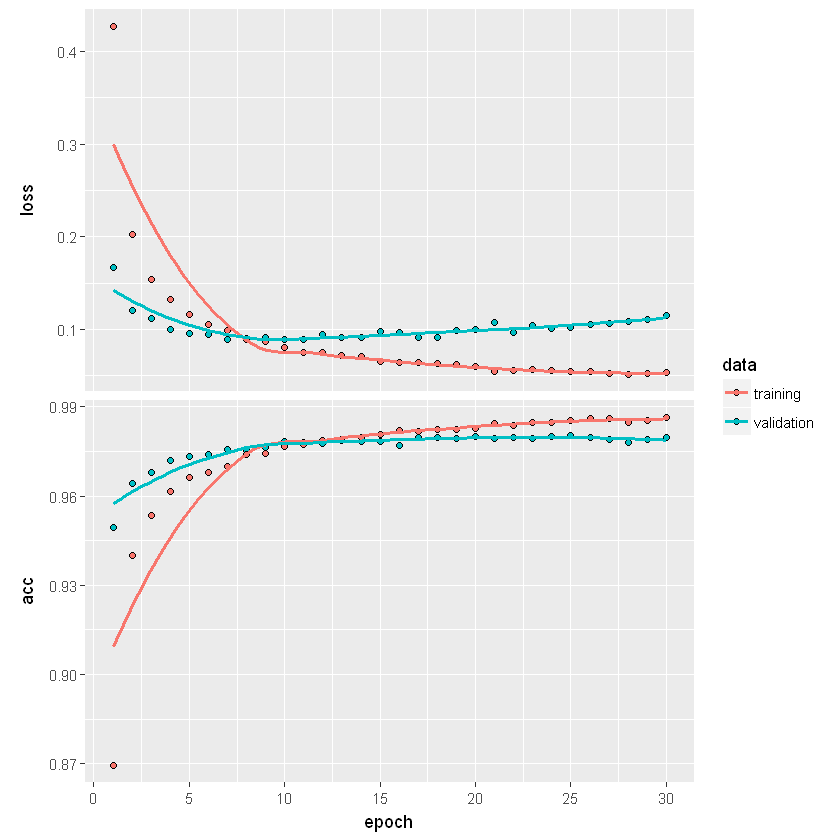

In [5]:
## digit recognition, example taken from keras.rstudio.com

mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

(history = model %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)) %>% plot

model %>% evaluate(x_test, y_test)

### Want more?

- http://keras.rstudio.com
- https://tensorflow.rstudio.com
    - [Hyperparameter Optimization with tfruns](https://tensorflow.rstudio.com/tools/tfruns/articles/overview.html)
    - [Visualize training with TensorBoard](https://tensorflow.rstudio.com/tools/tensorboard.html)
- [Keras reference manual](https://cran.r-project.org/web/packages/keras/keras.pdf)
- [TensorFlow reference manual](https://cran.r-project.org/web/packages/tensorflow/tensorflow.pdf)
- https://rstudio.cloud/ (to work on the cloud... for free)